In [16]:
%matplotlib notebook

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

Many styles available in matplotlib:

In [20]:
plt.style.available

['classic',
 'fast',
 'seaborn-muted',
 'seaborn-deep',
 'seaborn-white',
 'seaborn-pastel',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn',
 'seaborn-poster',
 'seaborn-notebook',
 'seaborn-colorblind',
 'seaborn-darkgrid',
 'bmh',
 'dark_background',
 'fivethirtyeight',
 'Solarize_Light2',
 'grayscale',
 'seaborn-bright',
 'seaborn-dark-palette',
 'seaborn-paper',
 'ggplot',
 'seaborn-dark',
 'seaborn-whitegrid',
 '_classic_test',
 'mysyle']

In [21]:
import scipy.stats
y = np.random.laplace(size=4000)
y += np.sin(y)
x = np.linspace(y.min(), y.max(), num=500)

<IPython.core.display.Javascript object>


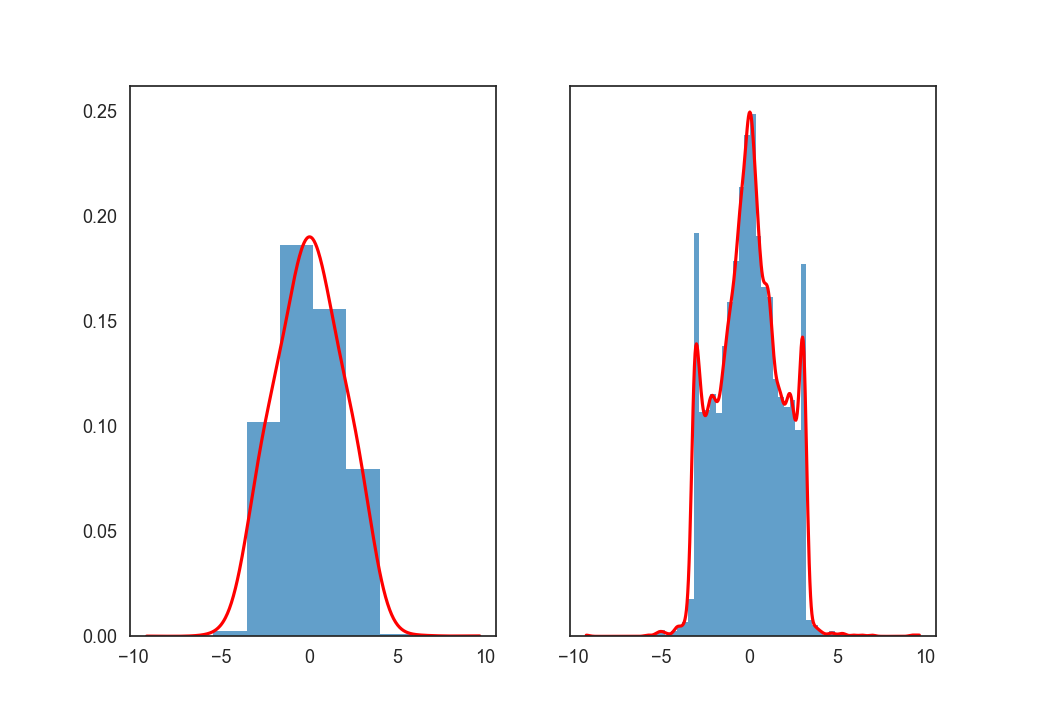

In [22]:
fig, axarr = plt.subplots(1, 2, sharey=True, sharex=True)

#gkm = ["scott", "silverman"]
gkm = [0.5, 0.1]
gk = [scipy.stats.gaussian_kde(y, bw_method=gki) for gki in gkm]

bkm=[None, "fd"]
plt.style.use("seaborn-white")
for ax, gki, bk in zip(axarr, gk, bkm):
    ax.hist(y, normed=True, bins=bk, alpha=0.7)
    ax.plot(y, y*0, "|", color="black")
    ax.plot(x, gki(x), color="r")

In [9]:
import seaborn as sns
plt.style.use("seaborn-white")

<IPython.core.display.Javascript object>


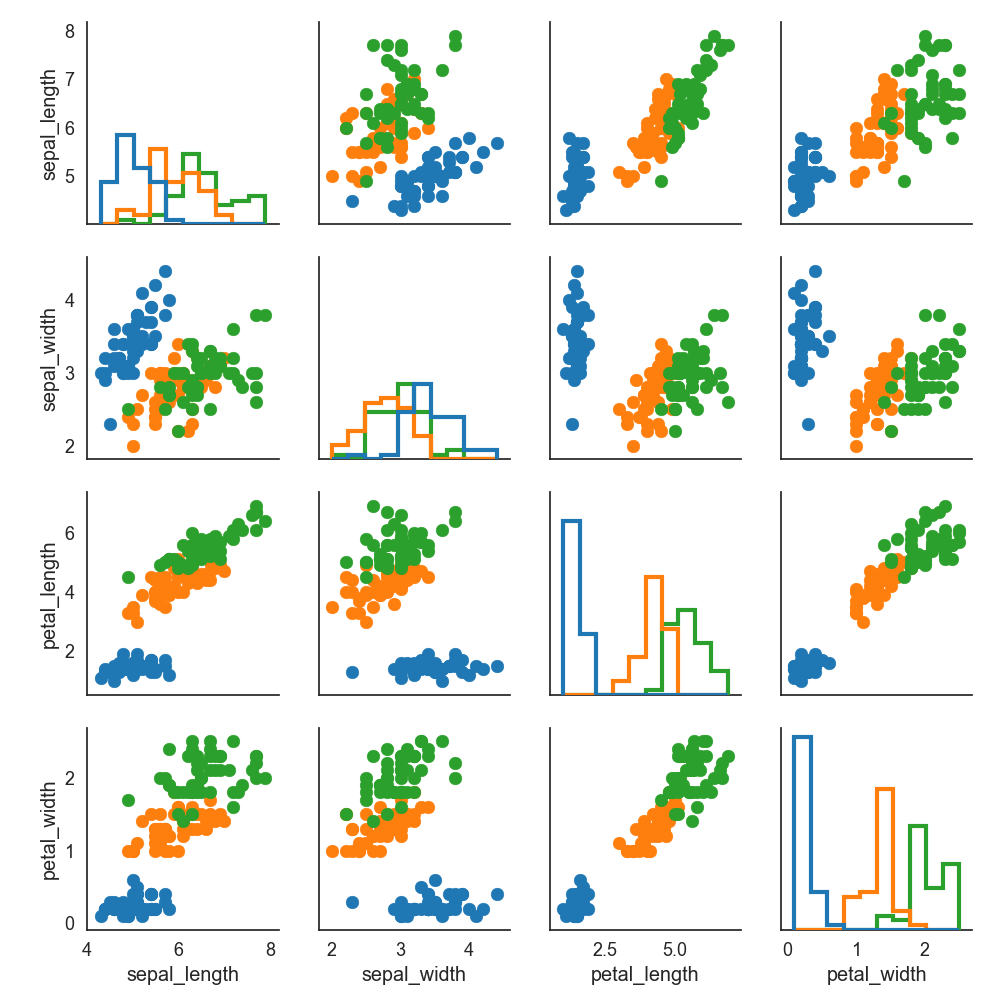

In [23]:
iris = sns.load_dataset("iris")
#g = sns.pairplot(iris, hue="species")
g = sns.PairGrid(iris, hue="species")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
#g = g.add_legend()

<IPython.core.display.Javascript object>


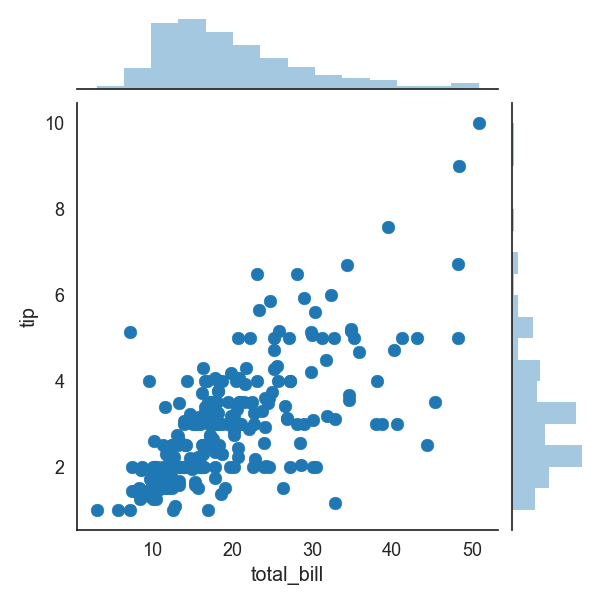

In [15]:
tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips, stat_func=None)

<IPython.core.display.Javascript object>


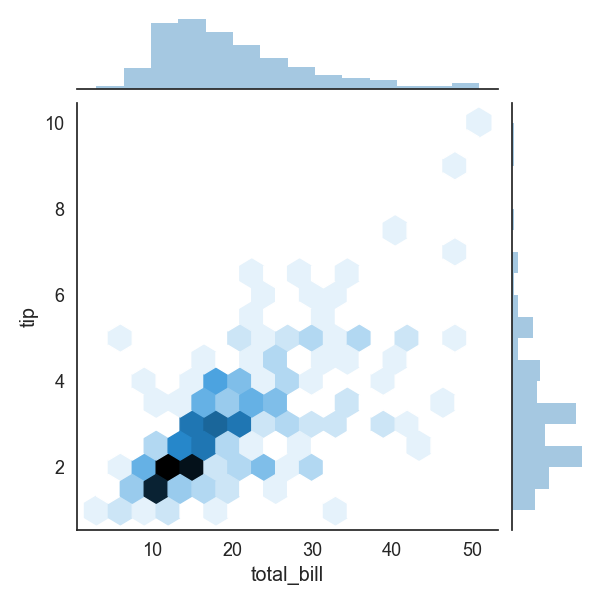

In [24]:
tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex', stat_func=None)

<IPython.core.display.Javascript object>


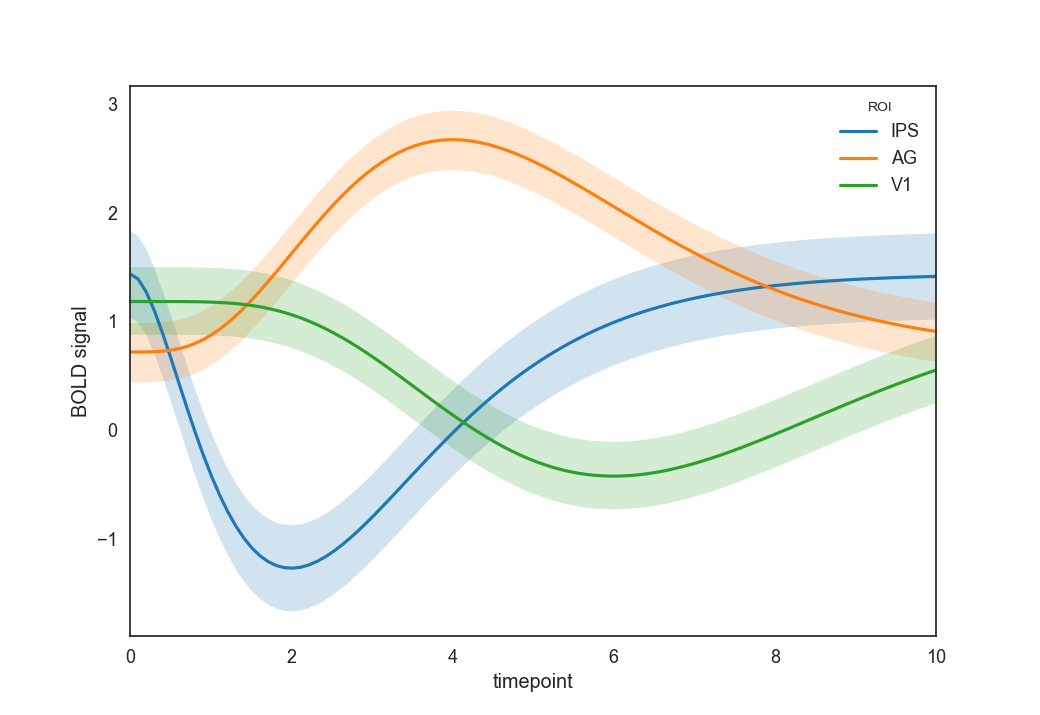

/scratch/tc427/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


In [25]:
gammas = sns.load_dataset("gammas")
fig, ax = plt.subplots()
ax = sns.tsplot(time="timepoint", value="BOLD signal",unit="subject", condition="ROI",data=gammas)

<IPython.core.display.Javascript object>


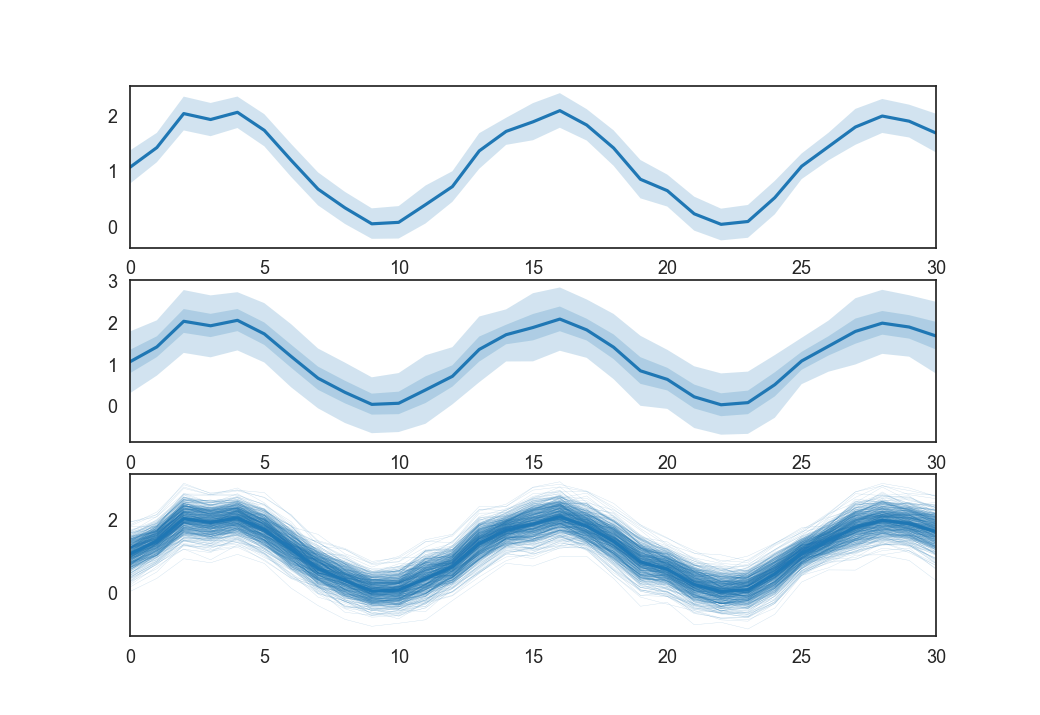

/scratch/tc427/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


In [13]:
x_ = np.linspace(0, 15, 31)
data = np.sin(x_) + np.random.rand(10, 31) + np.random.randn(10, 1)
fig, ax = plt.subplots(3,1)
sns.tsplot(data=data, ax=ax[0])
sns.tsplot(data=data, ax=ax[1], ci=[66,99])
sns.tsplot(data=data, ax=ax[2], err_style="boot_traces", n_boot=500)

<IPython.core.display.Javascript object>


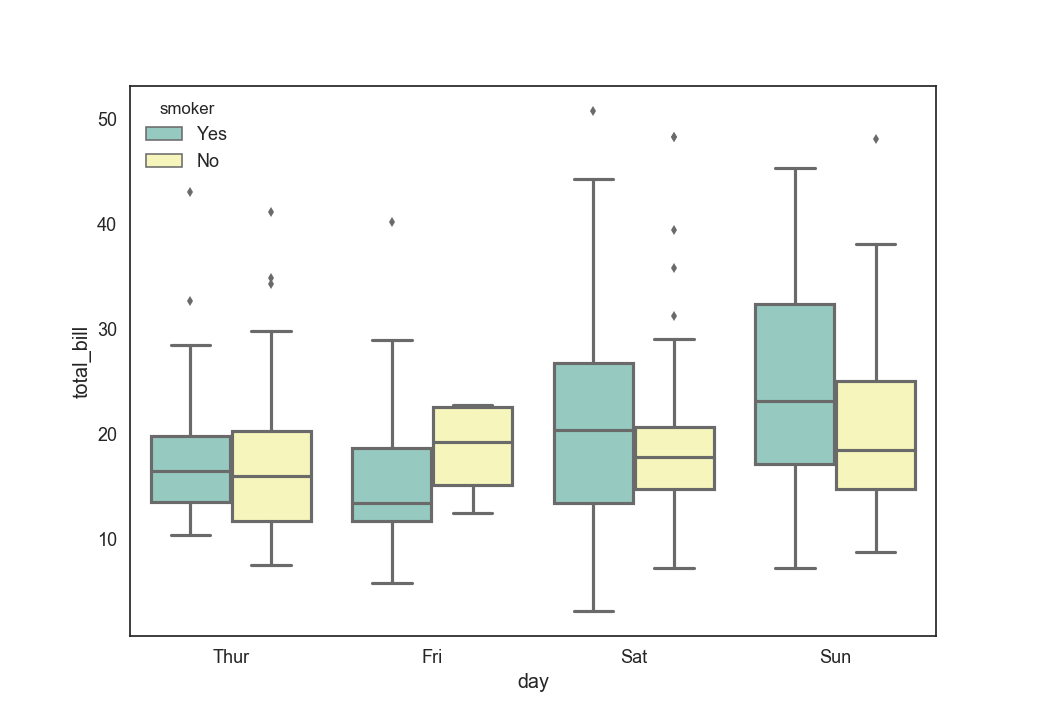

In [14]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="Set3")

# There are many ways to plot a distributions

In [183]:
y = np.random.laplace(size=200)
y += np.sin(y)
y = np.concatenate((np.random.normal(size=100, scale=0.5, loc=-0.8),
                   np.random.normal(size=100, scale=0.3, loc=0.5)))
x = np.linspace(y.min(), y.max(), num=500)

In [184]:
yd = pd.DataFrame(y, columns=["y"])
yd["x"] = 0

<IPython.core.display.Javascript object>


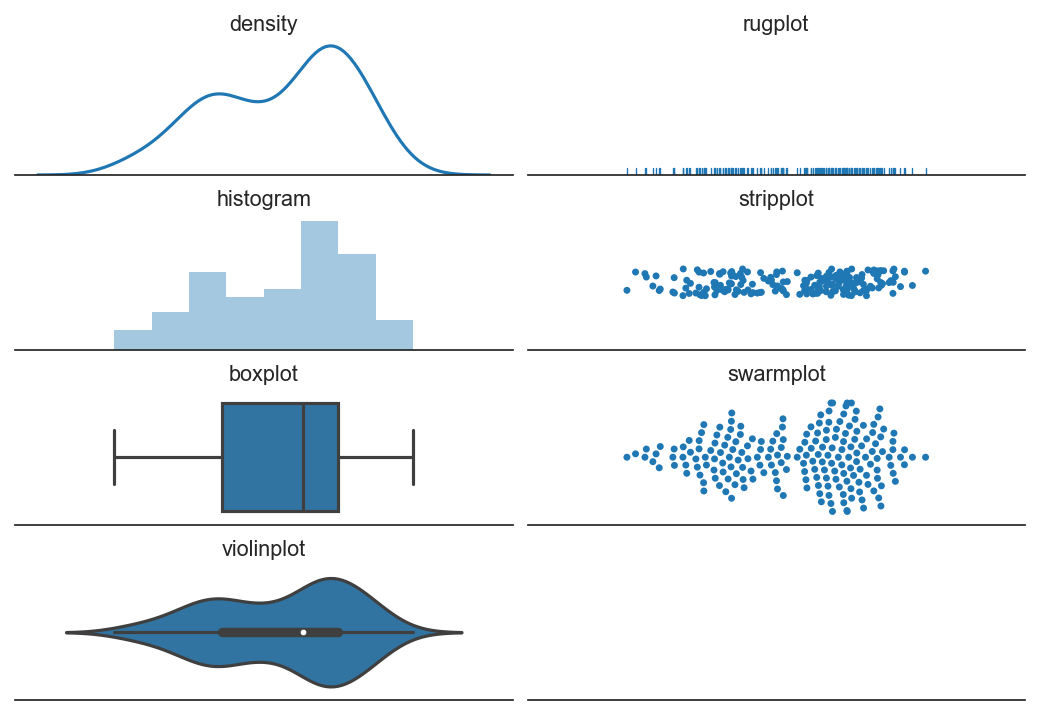

In [185]:
fix, axes = plt.subplots(4,2, sharex=True)
sns.distplot(y, ax=axes[0,0], hist=False)
axes[0,0].set_title("density")
sns.distplot(y, ax=axes[1,0], hist=True, kde=False)
axes[1,0].set_title("histogram")
sns.boxplot(x="y", data=yd, ax=axes[2,0])
axes[2,0].set_title("boxplot")
sns.violinplot(x="y", data=yd, ax=axes[3,0])
axes[3,0].set_title("violinplot")
sns.distplot(y, ax=axes[0,1], hist=False, kde=False, rug=True)
axes[0,1].set_title("rugplot")
sns.stripplot(x="y", data=yd, ax=axes[1,1], jitter=True)
axes[1,1].set_title("stripplot")
sns.swarmplot(x="y", data=yd, ax=axes[2,1])
axes[2,1].set_title("swarmplot")

for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    sns.despine(ax=ax, left=True)

plt.tight_layout()
plt.show()

# Mean vs distributions

In the two plots below, the separation between the means with/without coffee is the same. However, the workdays distributions are well separated, while the weekends are not. This would not be obvious with a bar chart, for example

In [204]:
N = 100
y1 = np.concatenate((np.random.normal(size=N, scale=0.3, loc=-0.2),
                   np.random.normal(size=N, scale=0.2, loc=0.3)))+3
y2 = np.concatenate((np.random.normal(size=N, scale=0.8, loc=-0.2),
                   np.random.normal(size=N, scale=0.6, loc=0.3)))+3
x = np.linspace(y.min(), y.max(), num=500)

In [205]:
yd = pd.DataFrame(np.concatenate((y1, y2)), columns=["Productivity(hours)"])
#yd["weekends"] = y2
cof = ["No", ]*N + ["Yes", ]*N
yd["coffee"] = cof+cof
yd["period"]= ["Workdays", ]*2*N + ["Weekends", ]*2*N

<IPython.core.display.Javascript object>


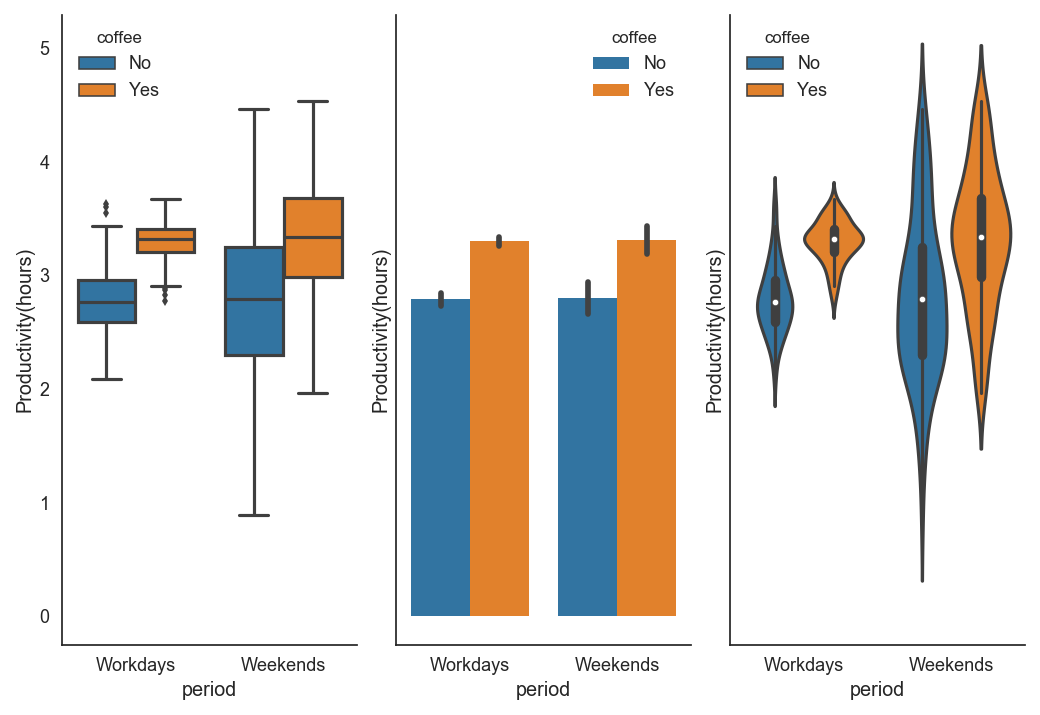

In [211]:
fix, axes = plt.subplots(1,3, sharex=True, sharey=True)
sns.boxplot(x="period", y="Productivity(hours)", hue="coffee", data=yd, ax=axes[0])
sns.barplot(x="period", y="Productivity(hours)", hue="coffee", data=yd, ax=axes[1])
sns.violinplot(x="period", y="Productivity(hours)", hue="coffee", data=yd, ax=axes[2])

for ax in axes:
    sns.despine(ax=ax)

plt.tight_layout()
plt.show()